In [1]:
import mdsynthesis as mds

In [2]:
top = '../../sandbox/dims/adk4ake.psf'

In [3]:
import glob

In [69]:
trajs = glob.glob('../../sandbox/dims/*co*.dcd')

In [70]:
trajs

['../../sandbox/dims/dims_co_001.dcd',
 '../../sandbox/dims/dims_co_003.dcd',
 '../../sandbox/dims/dims_co_002.dcd']

In [71]:
sims = []
for i, traj in enumerate(trajs):
    s = mds.Sim('adk_dims_co_{}'.format(i))
    s.universes.add('main', top, traj)
    s.tags.add('closed to open', 'dims', 'AdK')
    sims.append(s)

In [72]:
sims

[<Sim: 'adk_dims_co_0'>, <Sim: 'adk_dims_co_1'>, <Sim: 'adk_dims_co_2'>]

In [73]:
b = mds.Bundle(sims)

In [74]:
import numpy as np
from numpy.linalg import norm

def theta_NMP(u):
    """Calculate the NMP-CORE angle for E. coli AdK in degrees"""
    C = u.select_atoms("resid 115:125 and backbone").center_of_geometry()
    B = u.select_atoms("resid 90:100 and backbone").center_of_geometry()
    A = u.select_atoms("resid 35:55 and backbone").center_of_geometry()
    BA = A - B
    BC = C - B
    theta = np.arccos(np.dot(BA, BC)/(norm(BA)*norm(BC)))
    return np.rad2deg(theta)

def theta_LID(u):
    """Calculate the LID-CORE angle for E. coli AdK in degrees"""
    C = u.select_atoms("resid 179:185 and backbone").center_of_geometry()
    B = u.select_atoms("resid 115:125 and backbone").center_of_geometry()
    A = u.select_atoms("resid 125:153 and backbone").center_of_geometry()
    BA = A - B
    BC = C - B
    theta = np.arccos(np.dot(BA, BC)/(norm(BA)*norm(BC)))
    return np.rad2deg(theta)

In [75]:
import pandas as pd

In [76]:
def get_angles(sim):
    
    times = []
    nmp = []
    lid = []
    for ts in sim.universe.trajectory:
        
        times.append(ts.time)
        nmp.append(theta_NMP(sim.universe))
        lid.append(theta_LID(sim.universe))
        
    sim.data['angles'] = pd.DataFrame({'nmp': nmp, 'lid': lid}, index=pd.Float64Index(times, name='time'))  

In [77]:
b.map(get_angles, processes=4)

In [28]:
%matplotlib inline

In [86]:
df = b.data.retrieve('angles', by='name')

In [87]:
df

lid        nmp
              time                            
adk_dims_co_1 0.000000   107.746361  43.693527
              1.000000   108.688110  43.912292
              2.000000   109.066360  44.909145
              3.000000   110.141846  44.895779
              4.000000   109.701851  45.501038
              5.000000   111.087746  46.060654
              6.000000   111.192871  45.659397
              7.000000   112.437393  46.636307
              8.000000   112.418472  46.410358
              8.999999   113.344925  46.747562
              9.999999   114.676765  46.581314
              10.999999  115.421257  46.709526
              11.999999  116.892441  47.075382
              12.999999  117.279480  47.763039
              13.999999  117.428337  47.482304
              14.999999  117.955544  48.119770
              15.999999  118.185013  48.688992
              16.999999  119.132088  48.849361
              17.999999  118.234650  49.023621
              18.999999  119.742760  49.321907
              19.999999  121.935890  49.106030
              20.999999  122.340157  49.097511
              21.999999  123.494911  48.814301
              22.999999  124.488907  48.738827
              23.999999  124.620743  48.582165
              24.999998  124.241600  48.843987
              25.999998  124.441284  48.992779
              26.999998  125.163155  49.616123
              27.999998  125.363747  49.676521
              28.999998  126.429077  50.299141
...                             ...        ...
adk_dims_co_2 61.999996  143.301971  65.546333
              62.999996  143.740723  65.866051
              63.999996  144.299698  66.695663
              64.999996  144.038910  66.779984
              65.999996  143.514374  67.615723
              66.999996  143.292450  68.065170
              67.999996  143.996490  68.216766
              68.999996  144.913437  68.320290
              69.999996  143.540009  68.696655
              70.999996  144.514389  69.490463
              71.999996  144.775299  69.618584
              72.999996  144.561462  69.948677
              73.999996  145.137131  70.329880
              74.999995  144.606354  70.028976
              75.999995  144.171646  70.462669
              76.999995  143.871414  70.004959
              77.999995  143.581940  70.039040
              78.999995  144.594818  69.985107
              79.999995  144.558426  70.148636
              80.999995  145.245392  69.879143
              81.999995  145.288910  70.435394
              82.999995  145.182144  70.611862
              83.999995  144.800522  70.610153
              84.999995  144.772598  70.824272
              85.999995  144.929245  71.161125
              86.999995  144.982040  71.233696
              87.999995  144.851288  71.082558
              88.999995  144.478210  70.630051
              89.999995  144.938492  71.176178
              90.999995  145.331528  71.269325

[289 rows x 2 columns]

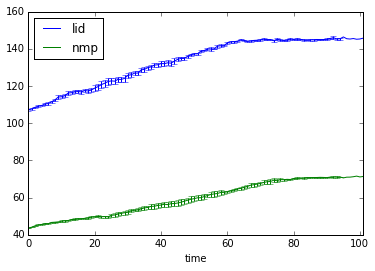

In [89]:
df.mean(level=1).plot(yerr=df.sem(level=1))

## Bonus plot

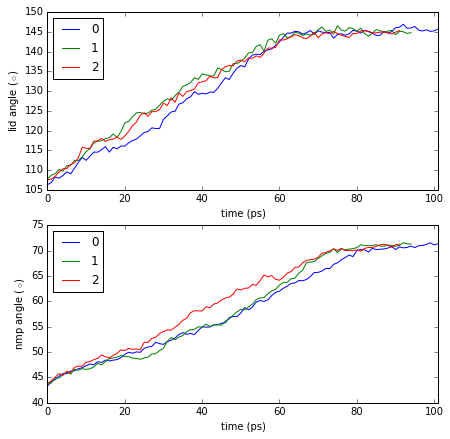

In [94]:
fig = plt.figure(figsize=(7, 7))
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2)

for name, group in df.groupby(level=0):
    group.reset_index()['lid'].plot(label=name[-1], ax=ax1, x='times', legend=True)
    group.reset_index()['nmp'].plot(label=name[-1], ax=ax2, x='times', legend=True)
    
ax1.set_ylabel('lid angle ($\circ$)')
ax1.set_xlabel('time (ps)')
ax2.set_ylabel('nmp angle ($\circ$)')
ax2.set_xlabel('time (ps)')